In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage import io, color

# Load the microstructure image
image = io.imread('/Users/maniksinghsarmaal/Downloads/m1.jpg')
gray_image = color.rgb2gray(image)

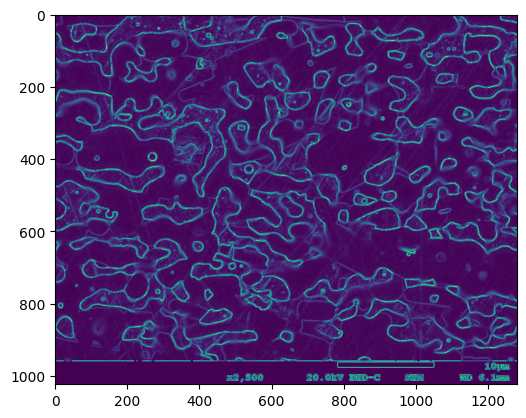

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the microstructure image
image = cv2.imread('/Users/maniksinghsarmaal/Downloads/m1.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the gradient in the x-direction
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Compute the gradient in the y-direction
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Compute the gradient orientation
gradient_orientation = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)
# Display the gradient magnitude and orientation
plt.imshow(gradient_magnitude.astype(np.uint8))


In [9]:

# Define the size of the grid
grid_size = 250

# Choose a random starting point within the image boundaries
start_x = np.random.randint(0, gray_image.shape[0] - grid_size)
start_y = np.random.randint(0, gray_image.shape[1] - grid_size)

# Extract the grid
grid_image = gray_image[start_x:start_x + grid_size, start_y:start_y + grid_size]

# Flatten the grid into a 1D array
flattened_grid = grid_image.flatten().reshape(-1, 1)

# Normalize pixel values
normalized_grid = (flattened_grid - np.min(flattened_grid)) / (np.max(flattened_grid) - np.min(flattened_grid))

# Determine the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_clusters=5):
    distortions = []
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return distortions, silhouette_scores

distortions, silhouette_scores = find_optimal_clusters(normalized_grid, max_clusters=10)
# Plot both the elbow method graph and silhouette score plot
plt.figure(figsize=(12, 5))

# Elbow method graph
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

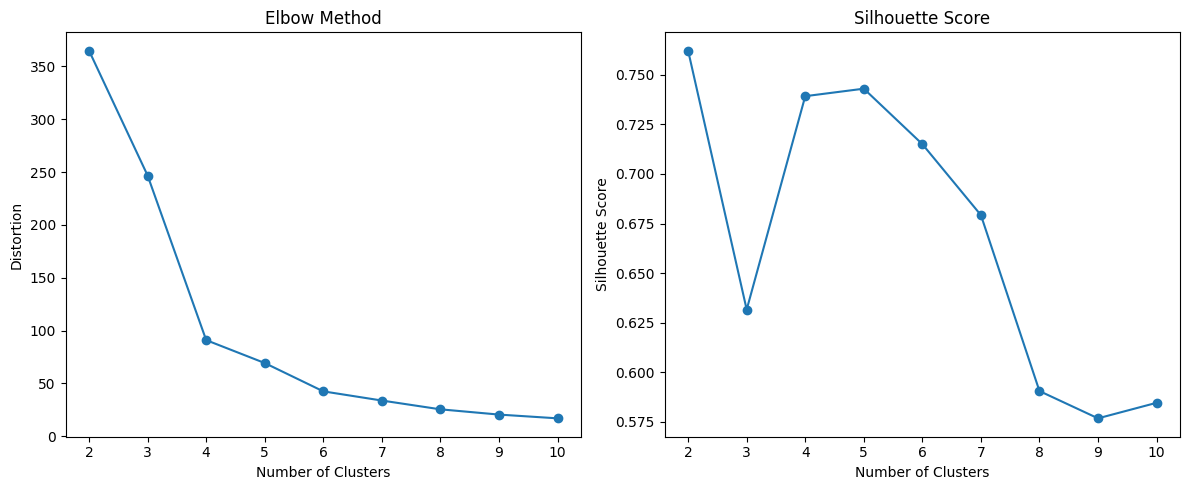

In [10]:
from skimage.transform import resize
# Resize the image to 250x250
resized_image = resize(gray_image, (250, 250))

# Flatten the resized image into a 1D array
flattened_resized_image = resized_image.flatten().reshape(-1, 1)

# Normalize pixel values
normalized_resized_image = (flattened_resized_image - np.min(flattened_resized_image)) / (np.max(flattened_resized_image) - np.min(flattened_resized_image))

# Determine the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_clusters=5):
    distortions = []
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return distortions, silhouette_scores

distortions, silhouette_scores = find_optimal_clusters(normalized_resized_image, max_clusters=10)

# Plot both the elbow method graph and silhouette score plot
plt.figure(figsize=(12, 5))

# Elbow method graph
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

K  | Proportion Above Avg | Cluster Std
--------------------------------------
2  | 0.737504 | 13428.0000
3  | 0.731728 | 15742.5026
4  | 0.705376 | 11765.8441
5  | 0.697968 | 10686.6045


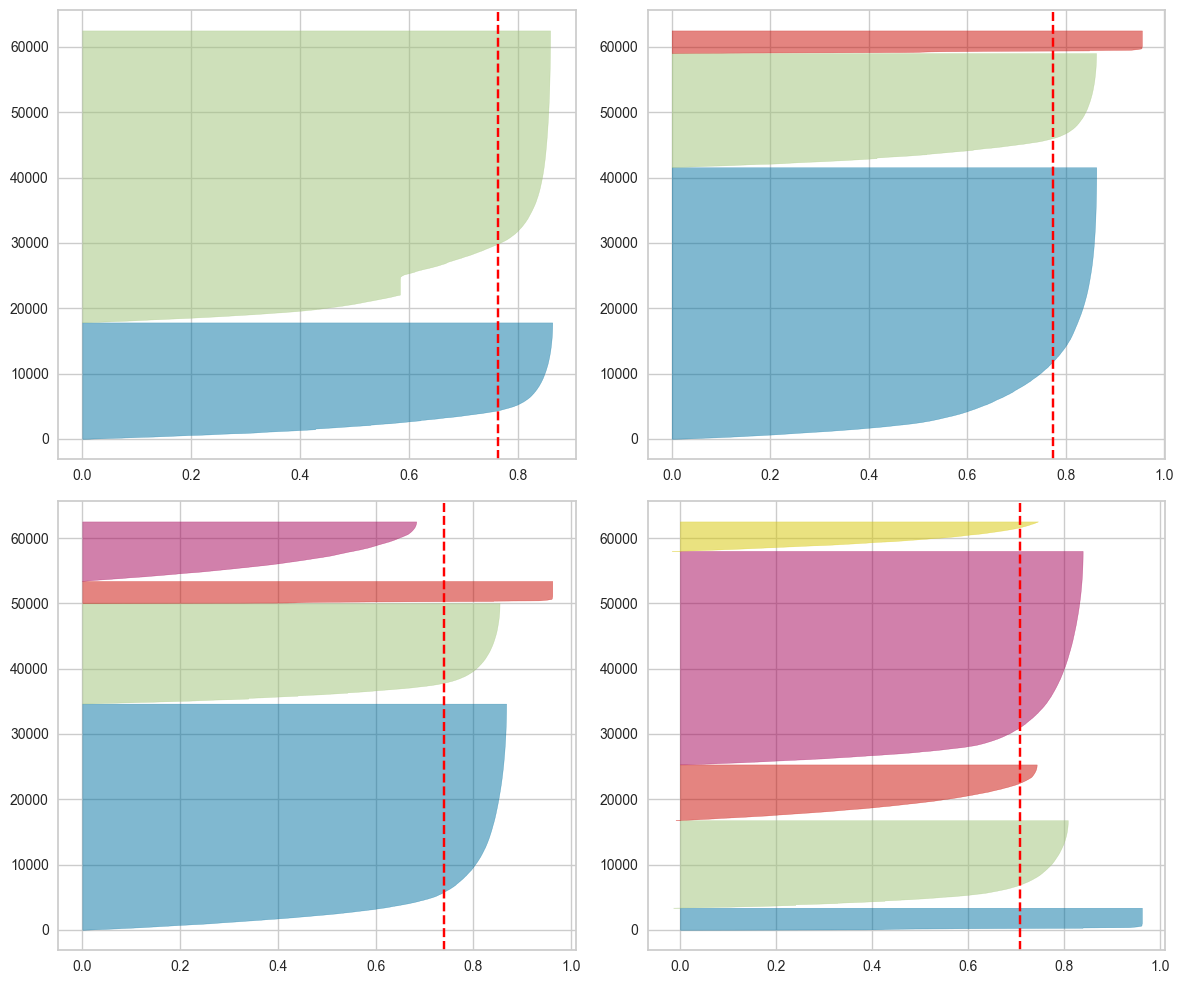

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage import io, color
from yellowbrick.cluster import SilhouetteVisualizer
from skimage.transform import resize
from sklearn.metrics import silhouette_samples
# Resize the image to 250x250
resized_image = resize(gray_image, (250, 250))

# Flatten the resized image into a 1D array
flattened_resized_image = resized_image.flatten().reshape(-1, 1)

# Normalize pixel values
normalized_resized_image = (flattened_resized_image - np.min(flattened_resized_image)) / (np.max(flattened_resized_image) - np.min(flattened_resized_image))

# Plot silhouette scores using Yellowbrick's SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Determine the optimal number of clusters using the silhouette score
max_clusters = 5
results = []
# Plot Silhouette Visualizer
for i in range(2, max_clusters + 1):
    q, mod = divmod(i, 2)
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(normalized_resized_image)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(normalized_resized_image)
    silhouette_vals = silhouette_samples(normalized_resized_image, km.labels_)
    avg_silhouette = np.mean(silhouette_vals)
    prop_above_avg = np.mean(silhouette_vals > avg_silhouette, axis=0)
    cluster_sizes = np.bincount(km.labels_)
    cluster_std = np.std(cluster_sizes)
    results.append((i, prop_above_avg, cluster_std))

# Output the results as a table
print("K  | Proportion Above Avg | Cluster Std")
print("--------------------------------------")
for result in results:
    print("{:<3}| {} | {:.4f}".format(result[0], result[1], result[2]))

plt.tight_layout()
plt.show()

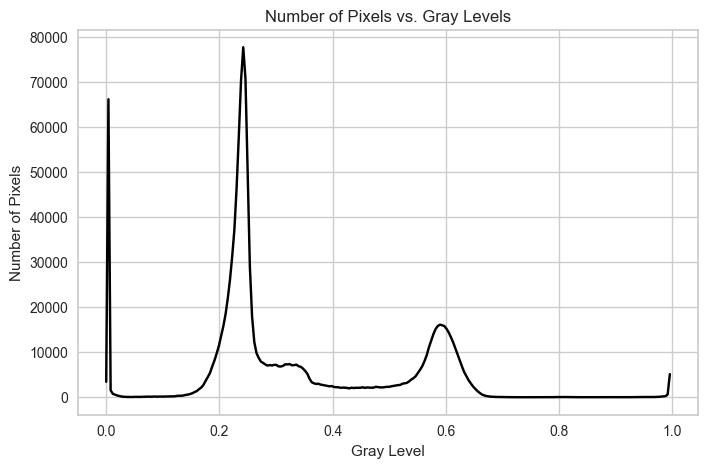

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Convert the image to grayscale and normalize pixel values
gray_image = color.rgb2gray(image)

# Calculate the histogram of pixel intensities
hist, bins = np.histogram(gray_image.ravel(), bins=256, range=(0,1))

# Plot the number of pixels (voxels) versus gray levels
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], hist, color='black')
plt.title('Number of Pixels vs. Gray Levels')
plt.xlabel('Gray Level')
plt.ylabel('Number of Pixels')
plt.show()

Area fraction of phase 0: 15.89%
Area fraction of phase 1: 58.81%
Area fraction of phase 2: 25.30%


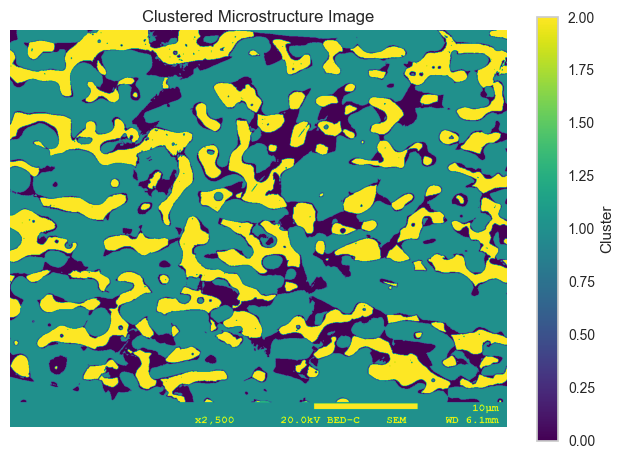

In [20]:
# Based on the elbow method, choose the number of clusters
num_clusters = 3
# Flatten the image into a 1D array
flattened_image = gray_image.flatten().reshape(-1, 1)

# Normalize pixel values
normalized_image = (flattened_image - np.min(flattened_image)) / (np.max(flattened_image) - np.min(flattened_image))
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(normalized_image)

# Assign labels to each pixel
cluster_labels = kmeans.labels_

# Reshape the cluster labels to the shape of the original image
clustered_image = cluster_labels.reshape(gray_image.shape)
area_fractions = []
total_pixels = clustered_image.size
for cluster in range(num_clusters):
    cluster_pixels = np.sum(clustered_image == cluster)
    area_fraction = cluster_pixels / total_pixels
    area_fractions.append(area_fraction)

# Print the area fraction of each phase
for i, area_fraction in enumerate(area_fractions):
    print(f"Area fraction of phase {i}: {area_fraction:.2%}")
# Plot the clustered image
plt.imshow(clustered_image, cmap='viridis')
plt.title('Clustered Microstructure Image')
plt.axis('off')
plt.colorbar(label='Cluster')
plt.show()

In [22]:
# Cu, Fe, Pd
hardness = 0.1589*107 + 0.5881*150 + 0.2530*65 
print(f'The hardness Value of This microstructure is: {hardness} ')

The hardness Value of This microstructure is: 121.66229999999999 


Area fraction of phase 0: 27.06%
Area fraction of phase 1: 72.94%


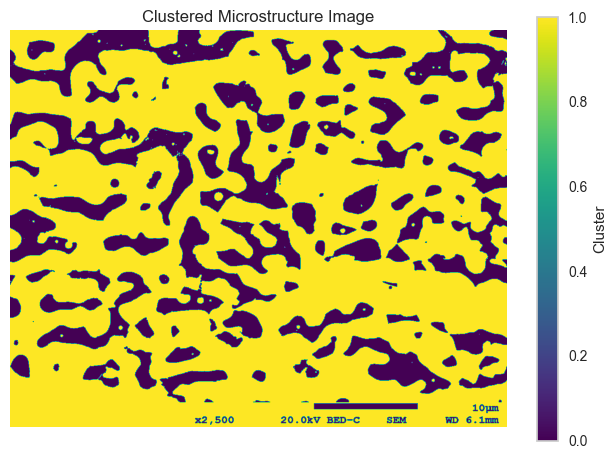

In [17]:
from sklearn.mixture import GaussianMixture

# Based on the elbow method, choose the number of clusters
num_clusters = 2

# Flatten the image into a 1D array
flattened_image = gray_image.flatten().reshape(-1, 1)

# Normalize pixel values
normalized_image = (flattened_image - np.min(flattened_image)) / (np.max(flattened_image) - np.min(flattened_image))

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(normalized_image)

# Assign labels to each pixel
cluster_labels = gmm.predict(normalized_image)

# Reshape the cluster labels to the shape of the original image
clustered_image = cluster_labels.reshape(gray_image.shape)

area_fractions = []
total_pixels = clustered_image.size

for cluster in range(num_clusters):
    cluster_pixels = np.sum(clustered_image == cluster)
    area_fraction = cluster_pixels / total_pixels
    area_fractions.append(area_fraction)

# Print the area fraction of each phase
for i, area_fraction in enumerate(area_fractions):
    print(f"Area fraction of phase {i}: {area_fraction:.2%}")

# Plot the clustered image
plt.imshow(clustered_image, cmap='viridis')
plt.title('Clustered Microstructure Image')
plt.axis('off')
plt.colorbar(label='Cluster')
plt.show()


Area fraction of phase 0: 28.22%
Area fraction of phase 1: 71.78%


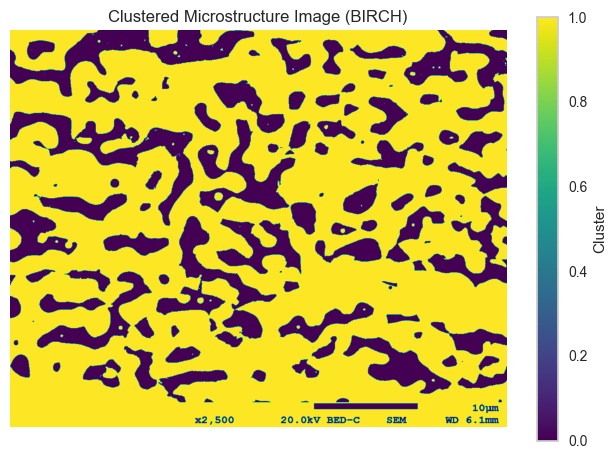

In [19]:
from sklearn.cluster import Birch

num_clusters = 2

# Flatten the image into a 1D array
flattened_image = gray_image.flatten().reshape(-1, 1)

# Normalize pixel values
normalized_image = (flattened_image - np.min(flattened_image)) / (np.max(flattened_image) - np.min(flattened_image))

# Apply BIRCH clustering
birch = Birch(threshold=0.01, n_clusters=num_clusters)
birch.fit(normalized_image)

# Assign labels to each pixel
cluster_labels = birch.predict(normalized_image)

# Reshape the cluster labels to the shape of the original image
clustered_image = cluster_labels.reshape(gray_image.shape)

# Calculate area fractions for each phase
area_fractions = []
total_pixels = clustered_image.size
for cluster in range(num_clusters):
    cluster_pixels = np.sum(clustered_image == cluster)
    area_fraction = cluster_pixels / total_pixels
    area_fractions.append(area_fraction)

# Print the area fraction of each phase
for i, area_fraction in enumerate(area_fractions):
    print(f"Area fraction of phase {i}: {area_fraction:.2%}")

# Plot the clustered image
plt.imshow(clustered_image, cmap='viridis')
plt.title('Clustered Microstructure Image (BIRCH)')
plt.axis('off')
plt.colorbar(label='Cluster')
plt.show()


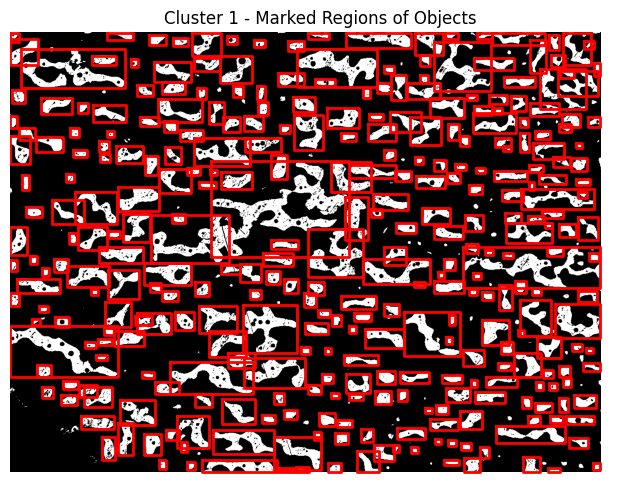

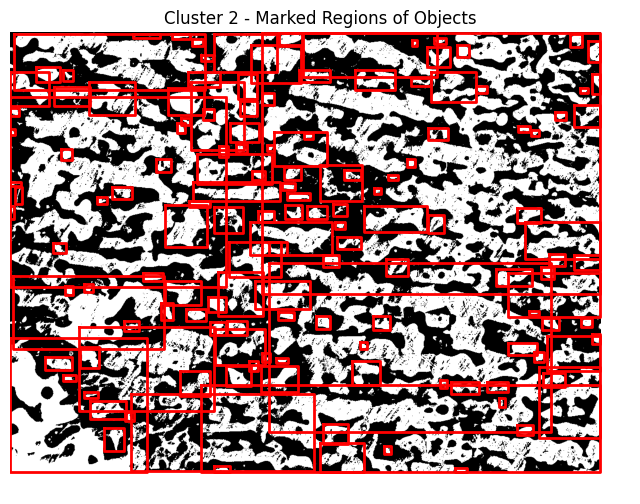

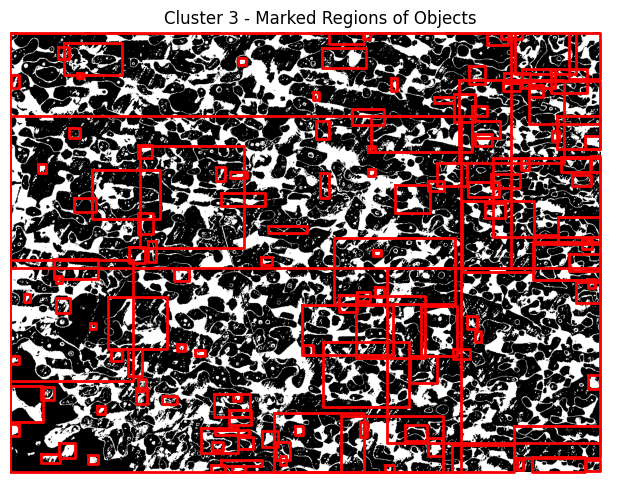

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from skimage.measure import label, regionprops

# Define the minimum area threshold for excluding small objects
min_area_threshold = 100  # Adjust this threshold as needed

# Create a Pandas Excel writer using xlsxwriter as the engine
writer = pd.ExcelWriter('clusters_data_new.xlsx', engine='xlsxwriter')

# Iterate through each cluster
for cluster in range(num_clusters):
    # Create a binary mask for the current cluster
    cluster_mask = np.where(clustered_image == cluster, 255, 0).astype(np.uint8)

    # Label connected components in the cluster mask
    label_img = label(cluster_mask)

    # Get region properties for each labeled region
    regions = regionprops(label_img)

    # Create a DataFrame to store the data for the current cluster
    data = {'Object': [], 'Centroid_X': [], 'Centroid_Y': [], 'Orientation': [], 'Axis_Minor_Length': [], 'Axis_Major_Length': [], 'Bounding_Box_Min_Row': [], 'Bounding_Box_Min_Col': [], 'Bounding_Box_Max_Row': [], 'Bounding_Box_Max_Col': []}

    # Create a plot to visualize the marked regions of objects
    plt.figure(figsize=(8, 8))
    plt.imshow(cluster_mask, cmap='gray')
    plt.title(f'Cluster {cluster + 1} - Marked Regions of Objects')

    # Iterate through each labeled region in the cluster
    for idx, props in enumerate(regions):
        # Check if the area of the current object is above the threshold
        if props.area >= min_area_threshold:
            # Get bounding box coordinates
            minr, minc, maxr, maxc = props.bbox

            # Draw bounding box on the plot
            plt.plot([minc, minc, maxc, maxc, minc], [minr, maxr, maxr, minr, minr], linewidth=2, color='red')

            # Append data to the DataFrame
            data['Object'].append(idx + 1)
            data['Centroid_X'].append(props.centroid[1])
            data['Centroid_Y'].append(props.centroid[0])
            data['Orientation'].append(props.orientation)
            data['Axis_Minor_Length'].append(props.minor_axis_length)
            data['Axis_Major_Length'].append(props.major_axis_length)
            data['Bounding_Box_Min_Row'].append(minr)
            data['Bounding_Box_Min_Col'].append(minc)
            data['Bounding_Box_Max_Row'].append(maxr)
            data['Bounding_Box_Max_Col'].append(maxc)

    # Create a DataFrame from the data dictionary
    df = pd.DataFrame(data)

    # Write the DataFrame to a new Excel sheet with the name 'Cluster {cluster + 1}'
    df.to_excel(writer, sheet_name=f'Cluster {cluster + 1}', index=False)

    # Show the plot
    plt.axis('off')
    plt.show()

# Save the Excel file
writer.close()



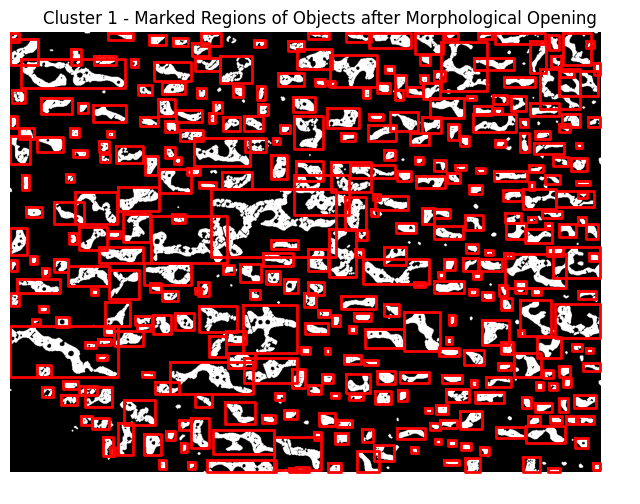

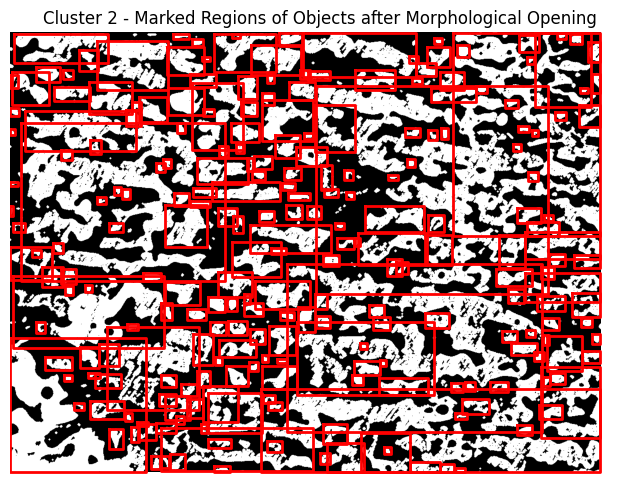

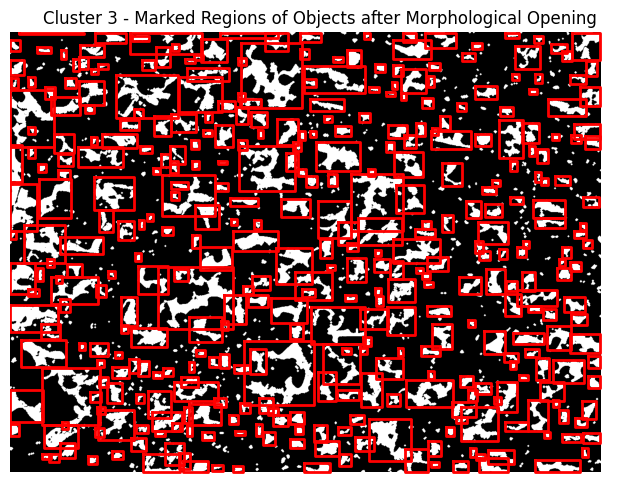

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from skimage.measure import label, regionprops
from skimage.morphology import binary_opening, disk

# Define the minimum area threshold for excluding small objects
min_area_threshold = 100  # Adjust this threshold as needed

# Create a Pandas Excel writer using xlsxwriter as the engine
writer = pd.ExcelWriter('clusters_data_new_open.xlsx', engine='xlsxwriter')

# Iterate through each cluster
for cluster in range(num_clusters):
    # Create a binary mask for the current cluster
    cluster_mask = np.where(clustered_image == cluster, 255, 0).astype(np.uint8)

    # Apply morphological opening to remove thin connections
    cluster_mask_opened = binary_opening(cluster_mask, disk(2))

    # Label connected components in the opened cluster mask
    label_img = label(cluster_mask_opened)

    # Get region properties for each labeled region
    regions = regionprops(label_img)

    # Create a DataFrame to store the data for the current cluster
    data = {'Object': [], 'Centroid_X': [], 'Centroid_Y': [], 'Orientation': [], 'Axis_Minor_Length': [], 'Axis_Major_Length': [], 'Bounding_Box_Min_Row': [], 'Bounding_Box_Min_Col': [], 'Bounding_Box_Max_Row': [], 'Bounding_Box_Max_Col': []}

    # Create a plot to visualize the marked regions of objects
    plt.figure(figsize=(8, 8))
    plt.imshow(cluster_mask_opened, cmap='gray')
    plt.title(f'Cluster {cluster + 1} - Marked Regions of Objects after Morphological Opening')

    # Iterate through each labeled region in the cluster
    for idx, props in enumerate(regions):
        # Check if the area of the current object is above the threshold
        if props.area >= min_area_threshold:
            # Get bounding box coordinates
            minr, minc, maxr, maxc = props.bbox

            # Draw bounding box on the plot
            plt.plot([minc, minc, maxc, maxc, minc], [minr, maxr, maxr, minr, minr], linewidth=2, color='red')

            # Append data to the DataFrame
            data['Object'].append(idx + 1)
            data['Centroid_X'].append(props.centroid[1])
            data['Centroid_Y'].append(props.centroid[0])
            data['Orientation'].append(props.orientation)
            data['Axis_Minor_Length'].append(props.minor_axis_length)
            data['Axis_Major_Length'].append(props.major_axis_length)
            data['Bounding_Box_Min_Row'].append(minr)
            data['Bounding_Box_Min_Col'].append(minc)
            data['Bounding_Box_Max_Row'].append(maxr)
            data['Bounding_Box_Max_Col'].append(maxc)

    # Create a DataFrame from the data dictionary
    df = pd.DataFrame(data)

    # Write the DataFrame to a new Excel sheet with the name 'Cluster {cluster + 1}'
    df.to_excel(writer, sheet_name=f'Cluster {cluster + 1}', index=False)

    # Show the plot
    plt.axis('off')
    plt.show()

# Save the Excel file
writer.close()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import io, color, filters, feature, morphology
# from skimage import measure

# # Convert the image to grayscale
# gray_image = color.rgb2gray(image)

# # Step 1: Edge Detection using Canny edge detection
# edges = feature.canny(gray_image, sigma=2)

# # Step 2: Morphological Closing to mask grains enclosed by edges
# closed_edges = morphology.closing(edges, morphology.disk(3))  # Adjust the disk size as needed

# # Display results
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax[0].imshow(gray_image, cmap='gray')
# ax[0].set_title('Original')
# ax[0].axis('off')

# ax[1].imshow(edges, cmap='gray')
# ax[1].set_title('Edge Detection (Canny)')
# ax[1].axis('off')

# ax[2].imshow(closed_edges, cmap='ocean')
# ax[2].set_title('Closed Edges (Masked Grains)')
# ax[2].axis('off')

# plt.tight_layout()
# plt.show()
# # Label connected components (closed entities)
# labels = measure.label(closed_edges, connectivity=2)

# # Count the number of unique labels (closed entities)
# num_closed_entities = np.max(labels)

# # Convert the grayscale image to RGB
# rgb_image = color.gray2rgb(gray_image)

# # Iterate through each labeled entity
# for label in range(1, num_closed_entities + 1):
#     # Create a mask for the current entity
#     entity_mask = (labels == label)

#     # Apply the mask to the RGB image
#     rgb_image[entity_mask] = [1, 0, 0]  # Set the color to red ([R, G, B] = [1, 0, 0])

# # Display the masked image
# plt.figure(figsize=(8, 6))
# plt.imshow(rgb_image)
# plt.title('Closed Entities Masked in Red')
# plt.axis('off')
# plt.show()
# print("Number of closed entities:", num_closed_entities)